<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Introducción a Keras LSTM para series de tiempo multivariadas)</center></span>

**<center>Ejemplo datos de clima (weather)</center>**

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Referencias</span>

1. [Introducción a Redes LSTM](Intro_LSTM.ipynb)
1. [Time Series Forecasting with LSTMs using TensorFlow 2 and Keras in Python](https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651/)
1. [Dive into Deep Learnig](https://d2l.ai/)
1. [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
1. Ralf C. Staudemeyer and Eric Rothstein Morris,[*Understanding LSTM a tutorial into Long Short-Term Memory Recurrent Neural Networks*](https://arxiv.org/pdf/1909.09586.pdf), arxiv, September 2019
1. Karpathy, [*The Unreasonable Effectiveness of Recurrent Neural Networks*](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
1. Anton Lucanus, [Making Automation More Efficient by Learning from Historical Trade Data](https://datafloq.com/read/making-automation-more-efficient-by-learning-from-/7444), 8:43 AM, January 7, 2020
1. https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
1. https://www.youtube.com/watch?v=2BrpKpWwT2A&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=1
1. https://towardsdatascience.com/using-lstms-for-stock-market-predictions-tensorflow-9e83999d4653
1. https://github.com/llSourcell/Reinforcement_Learning_for_Stock_Prediction/blob/master/README.md
1. [Tensoflow-Time series forecasting](https://www.tensorflow.org/tutorials/structured_data/time_series)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Importar las librería requeridas](#Importar-las-librería-requeridas)
* [El conjunto de datos weather](#El-conjunto-de-datos-weather)
* [Funciones para preparar datos de entrenamiento ](#Funciones-para-preparar-datos-de-entrenamiento)
* [Parte 1: Pronóstico de una serie de tiempo univariada](#Parte-1:-Pronóstico-de-una-serie-de-tiempo-univariada)
* [Modelo línea base: Baseline](#Modelo-línea-base)
* [Breve revisión de cache, shuffle, batch y repeat](#Breve-revisión-de-cache,-shuffle,-batch-y-repeat)
* [Crea el modelo LSTM univariado](#Crea-el-modelo-LSTM-univariado)
* [Predicciones](#Predicciones)
* [Pronóstico de una serie de tiempo multivariada](#Pronóstico-de-una-serie-de-tiempo-multivariada) 
* [Modelo de un Paso](#Modelo-de-un-paso)
* [Predicciones](#Predicciones)
* [Modelo multipaso](#Modelo-multipaso)
* [Predicciones](#Predicciones)
* [Los siguientes pasos](#Los-siguientes-pasos)

## <span style="color:blue">Introducción</span>


Este cuaderno es  una introducción a la predicción de series de tiempo utilizando redes neuronales recurrentes (RNN). Esto se cubre en dos partes: primero, pronosticará una serie de tiempo univariada, luego pronosticará una serie de tiempo multivariada.


## <span style="color:blue">Importar las librería requeridas</span>

In [41]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

print('version de tf: ', tf.__version__)

from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam 

version de tf:  2.4.1


## <span style="color:blue">El conjunto de datos weather</span> 


Usaremos el conjunto de datos (dataset) [weather time series dataset recorded by the Max Planck Institute for Biogeochemistry](https://www.bgc-jena.mpg.de/wetter/). Estan disponibles en [kaggle](https://www.kaggle.com/kusuri/jena-climate), en una versión preparada por Francois Chollet, la cual usaremos aquí.

Este dataset contiene 14 variables (features) diferentes tales como temperatura ambiente, presión atmosférica, y humedad. Estos datos fueron recolectados cada 10 minutos, comenzando en 2003. Por eficiencia, usaremos los datos recolectados entre 2009 y 2016. Estos datos fueron preparados por François Chollet para su libro Deep Learning with Python. En total son 420551 registros de datos.

In [3]:
# download teh data and store it in your system
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
# after download the file is in this path
csv_path, _ = os.path.splitext(zip_path) # /home/alvaro/.keras/datasets/jena_climate_2009_2016.csv'


In [4]:
csv_path

'/home/alvaro/.keras/datasets/jena_climate_2009_2016.csv'

In [5]:
df = pd.read_csv(csv_path)

### Una primera mirada a los datos 

In [6]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


Como puede verse arriba, se registra una observación cada 10 minutos. Esto significa que, durante una hora, se tendrán 6 observaciones. Del mismo modo, en un  día se tienen 144 (6x24) observaciones. En total son 420551 observaciones.

Dado un tiempo específico, digamos que desea predecir la temperatura 6 horas en el futuro. Para hacer esta predicción, se elige usar 5 días de observaciones. Por lo tanto, crearía una ventana que contiene las últimas 720 (5x144) observaciones para entrenar el modelo. Son posibles muchas de estas configuraciones, lo que hace que este conjunto de datos sea bueno para experimentar.

La siguiente función devuelve las ventanas de tiempo descritas anteriormente para entrenar el modelo. El parámetro *history_size* es el tamaño de la ventana de información pasada. El *target_size* es qué tan lejos en el futuro necesita el modelo aprender a predecir; *target_size* es la etiqueta que debe predecirse.

## <span style="color:blue">Funciones para gráficos</span>

In [49]:
def create_time_steps(length):
  return list(range(-length, 0))

In [50]:
def show_plot(plot_data, delta, title):
  labels = ['Historia', 'Futuro Verdadero' , 'Predicción del Modelo']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Salto de tiempo (Time-Step)')
  return plt

In [51]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Pérdida entrenamiento')
    plt.plot(epochs, val_loss, 'r', label='Pérdida validación')
    plt.title(title)
    plt.legend()

    plt.show()

In [ ]:
def plot_serie_prediction(y_test, y_pred,rms, epochs):
    plt.plot(np.arange(0, len(y_test)), y_test, marker='.', label="verdadero")
    plt.plot(np.arange(0, len(y_test)), y_pred, marker='+', label="predicho")
    plt.xlabel('Time Step')
    plt.annotate("rms = "+str(round(rms,2)) , xy=(100, 140), size = 15)
    #plt.annotate("modelo = LSTM(50), timestep=60" , xy=(100, 146), size = 15)
    #plt.annotate("epochs=40" , xy=(100, 143), size = 15)
    plt.title("Intervalo de predicción a un día. Escala original", size = 20)
    plt.legend()
    plt.show()

## <span style="color:blue">Funciones para preparar datos de entrenamiento</span>

### Caso Univariado

In [8]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    ''' dataset: conjunto de datos
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la venytana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
    '''
   
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    
    return np.array(data), np.array(labels)

### Caso multivariado

In [9]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    ''' dataset: conjunto de datos para las secuencias de entrada
        target:  conjunto de datos para las secuencias de salida
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la venytana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
        step: Cada cuántas observaciones deben tomarse. Para secuencias muy largas
              que no cambia mucho localmente
        single_step: Predecir solamente un valor futuro (=True),
                     o predecir todos los valores hasta target_size(=False)
    '''  
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

En las partes  siguientes, las primeras 300,000 filas de datos serán el conjunto de datos de entrenamiento, y el resto será el conjunto de datos de validación (120551). Esto equivale a unos 2100 días de datos de entrenamiento.


In [13]:
TRAIN_SPLIT = 300000

Se coloca una semilla para gerantizar reproductibidad

In [12]:
tf.random.set_seed(13)

## <span style="color:blue">Pronóstico de una serie de tiempo multivariada</span>


El conjunto de datos original contiene catorce variables (features). Para simplificar, esta sección considera solo tres de los catorce originales. Las características utilizadas son la temperatura del aire, la presión atmosférica y la densidad del aire.

Para usar más variables, agregue sus nombres a esta lista.

In [14]:
features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']

In [15]:
features = df[features_considered]
features.index = df['Date Time']
features.head()

,p (mbar),T (degC),rho (g/m**3)
Date Time,,,
01.01.2009 00:10:00,996.52,-8.02,1307.75
01.01.2009 00:20:00,996.57,-8.41,1309.80
01.01.2009 00:30:00,996.53,-8.51,1310.24
01.01.2009 00:40:00,996.51,-8.31,1309.19
01.01.2009 00:50:00,996.51,-8.27,1309.00



Echemos un vistazo a cómo cada una de estas características varía con el tiempo.


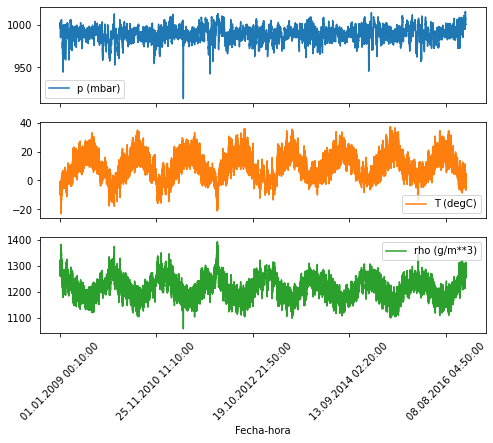

In [17]:
features.plot(subplots=True, rot=45, xlabel='Fecha-hora')
plt.show()

Como se mencionó, el primer paso será estandarizar el conjunto de datos utilizando la media y la desviación estándar de los datos de entrenamiento.

In [18]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [19]:
dataset = (dataset-data_mean)/data_std

## <span style="color:blue">Modelo de un Paso</span>


En una configuración de un  paso, el modelo aprende a predecir un solo punto en el futuro en función del historial proporcionado.

La función a continuación realiza la misma tarea de ventanas que antes, sin embargo, aquí muestra la observación pasada en función del tamaño de paso dado.

En este cuaderno, la red muestra datos de los últimos cinco (5) días, es decir, 720 observaciones que se muestrean cada hora. El muestreo se realiza cada  hora, ya que no se espera un cambio drástico en 60 minutos. Por lo tanto, 120 observaciones representan la historia de los últimos cinco días. Para el modelo de predicción de un solo paso, la etiqueta para un punto de datos es la temperatura dentro de 12 horas. Para crear una etiqueta para esto, se utiliza la temperatura después de 72 (12 * 6) observaciones.

### Crea arreglos de datos de entrenamiento y validación

In [30]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [31]:
print(dataset.shape)
print(x_train_single.shape)
print(y_train_single.shape)
print(x_val_single.shape)
print(y_val_single.shape)

(420551, 3)
(299280, 120, 3)
(299280,)
(119759, 120, 3)
(119759,)


Veamos una ventana de datos de la historia pasada

In [24]:
print ('Ventana ejemplo de la historia pasada : {}'.format(x_train_single[0].shape))

Ventana ejemplo de la historia pasada : (120, 3)


In [33]:
#x_train_single[0:10,:]

### Crea objetos tf.data.Dataset para entreno y validación

Para manejo más eficiente de memoria 

In [35]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

## <span style="color:blue">Breve revisión de cache, shuffle, batch y repeat</span>

### ¿Cómo trabaja dataset.shuffle()?

### ¿Cómo trabaja dataset.repeat() ?

### ¿ Qué produce dataset.batch?

<figure>
<center>
<img src="../Imagenes/time_series.png" width="400" height="200" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Diagrama Representando los datos luego de organizarlos por lotes (batching)"</p>
</figcaption>
</figure>

### ¿ Qué es el caché?

Los datos almacenados en caché son archivos, scripts, imágenes y otros elementos multimedia almacenados en su dispositivo después de abrir una aplicación o visitar un sitio web por primera vez. Estos datos se utilizan para cargar rápidamente información sobre la aplicación o el sitio web cada vez que se revisa. 

La memoria caché tiene una latencia extremadamente baja, lo que significa que se puede acceder muy rápidamente. La otra cara de la baja latencia significa que no se puede almacenar mucha memoria. Esta es la razón por la cual los archivos de pequeño tamaño  se almacenan en la memoria caché. 

Como cualquier red implementada en *tf.keras*  la capa de entrada requiere require el tamaño de entrada de los datos.


### Modelo LSTM 

In [43]:
input_shape = (x_train_single.shape[1], x_train_single.shape[2])
units = 32
drop_out_rate = 0.0

# layers
inputs = Input(input_shape)
x = Dropout(drop_out_rate, name= 'Dropout_01')(inputs)
x = LSTM(units=units, name='LSTM_layer',
         dropout=drop_out_rate, recurrent_dropout=drop_out_rate)(x)
x = Dropout(drop_out_rate, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
single_step_model = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
single_step_model.summary()


#single_step_model = tf.keras.models.Sequential()
#single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
#single_step_model.add(tf.keras.layers.Dense(1))

Model: "series_LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 3)]          0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 120, 3)            0         
_________________________________________________________________
LSTM_layer (LSTM)            (None, 32)                4608      
_________________________________________________________________
Dropout_02 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


### Compila

Usamos la función de costo mean absolute error definida por

$$
mae = \frac{1}{n}\sum_{i=1}^n|y_i - \tilde{y}_i|
$$

In [44]:
single_step_model.compile(optimizer=Adam(), loss='mae')

Revisemos una predicción simple

In [45]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(256, 1)


In [ ]:
#single_step_model.predict(x).T

### Entrena

In [46]:
EVALUATION_INTERVAL = 200
EPOCHS = 10
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 102s 468ms/step - loss: 0.4702 - val_loss: 0.2633
Epoch 2/10
200/200 [==============================] - 108s 540ms/step - loss: 0.2804 - val_loss: 0.2429
Epoch 3/10
200/200 [==============================] - 123s 617ms/step - loss: 0.2713 - val_loss: 0.2562
Epoch 4/10
200/200 [==============================] - 135s 674ms/step - loss: 0.2675 - val_loss: 0.2354
Epoch 5/10
200/200 [==============================] - 135s 674ms/step - loss: 0.2215 - val_loss: 0.2367
Epoch 6/10
200/200 [==============================] - 124s 620ms/step - loss: 0.2459 - val_loss: 0.2657
Epoch 7/10
200/200 [==============================] - 113s 567ms/step - loss: 0.2473 - val_loss: 0.2478
Epoch 8/10
200/200 [==============================] - 117s 586ms/step - loss: 0.2460 - val_loss: 0.2380
Epoch 9/10
200/200 [==============================] - 118s 589ms/step - loss: 0.2546 - val_loss: 0.2399
Epoch 10/10
200/200 [==============================] - 119s 594m

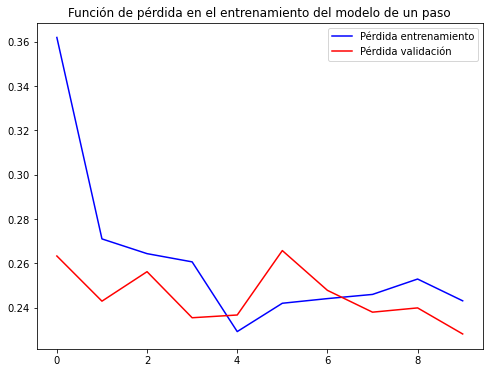

In [52]:
plot_train_history(single_step_history,
                   'Función de pérdida en el entrenamiento del modelo de un paso')

## <span style="color:blue">Predicciones</span>


Ahora que el modelo está entrenado, hagamos algunas predicciones de muestra. El modelo tiene el historial de tres features en los últimos cinco días muestreados cada hora (120 puntos de datos), ya que el objetivo es predecir la temperatura, el gráfico solo muestra la temperatura pasada. La predicción se hace un día en el futuro (de ahí la brecha entre la historia y la predicción).

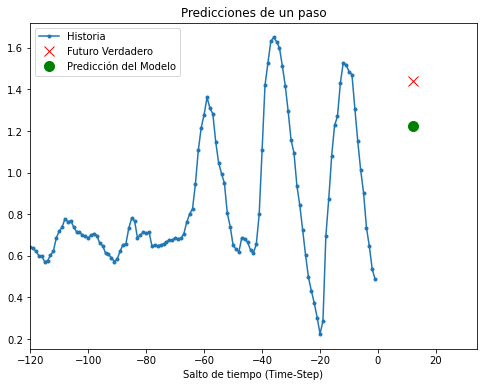

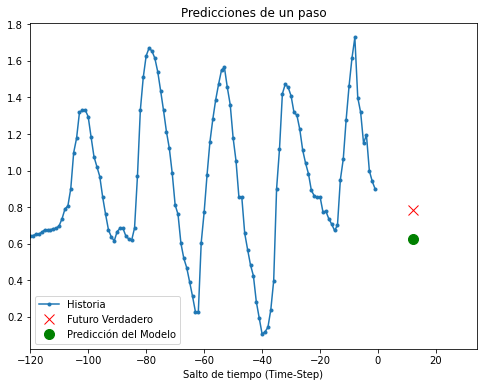

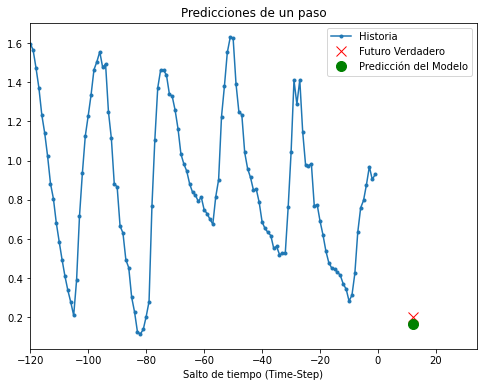

In [53]:
for x, y in val_data_single.take(3):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Predicciones de un paso')
    plot.show()

In [ ]:
y_pred =[]

for x, y in val_data_single:
    pred = single_step_model.predict(x)
    
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Predicciones de un paso')
    plot.show()


In [62]:
#y_pred = single_step_model.predict(x_val_single)
y_pred = np.squeeze(y_pred,axis=1)
y_test = y_val_single

In [64]:
print(y_pred.shape)
print(y_test.shape)

(119759,)
(119759,)


### rms

In [65]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred-y_test,2)))
print(rmsLSTM )

0.33212310373385173


In [88]:
def plot_series(y_test,y_pred, title, x_label, y_label,rms,epochs):
    plt.plot(np.arange(0, len(y_test)), y_test, marker='.', label="verdadero")
    plt.plot(np.arange(0, len(y_test)), y_pred, marker='+', label="predicho")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate("rms="+str(round(rms,2)) , xy=(500, 1.3), size = 10)
    #plt.annotate("modelo = LSTM(50), timestep=60" , xy=(100, 146), size = 15)
    #
    plt.annotate("epochs="+str(epochs) , xy=(500, 1.5), size = 10)
    plt.title(title)
    plt.legend()
    plt.show()
    


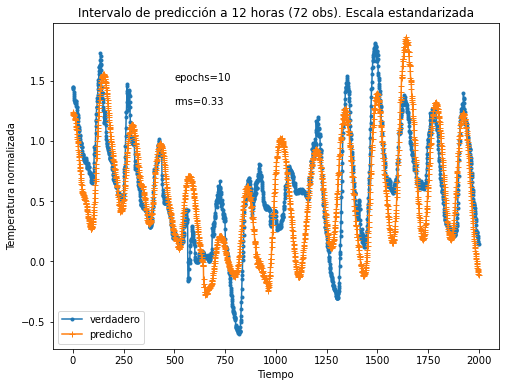

In [90]:
title = "Intervalo de predicción a 12 horas (72 obs). Escala estandarizada"
x_label = 'Tiempo'
y_label = 'Temperatura normalizada'
rms = rmsLSTM
plot_series(y_test[:2000], y_pred[:2000],title,x_label, y_label, rms,epochs=10 )

## <span style="color:blue">Modelo multipaso</span>

 En un modelo de predicción de varios pasos, dado un historial pasado, el modelo necesita aprender a predecir un rango de valores futuros. Por lo tanto, a diferencia de un modelo de un solo paso, donde solo se predice un único punto futuro, un modelo de varios pasos predice una secuencia del futuro.

Para el modelo de varios pasos, los datos de entrenamiento nuevamente consisten en grabaciones de los últimos cinco días muestreados cada hora. Sin embargo, aquí, el modelo necesita aprender a predecir la temperatura durante las próximas 12 horas. Como se toma una observación cada 10 minutos, el resultado es 72 predicciones. Para esta tarea, el conjunto de datos debe prepararse en consecuencia, por lo tanto, el primer paso es crearlo nuevamente, pero con una ventana de destino diferente.

In [91]:
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

Revisemos una muestra en un punto.

In [92]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 3)

 Target temperature to predict : (72,)


In [93]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

Plot de una muestra en un punto.

In [94]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

En este gráfico y otros similares, el historial y los datos futuros se muestrean cada hora.

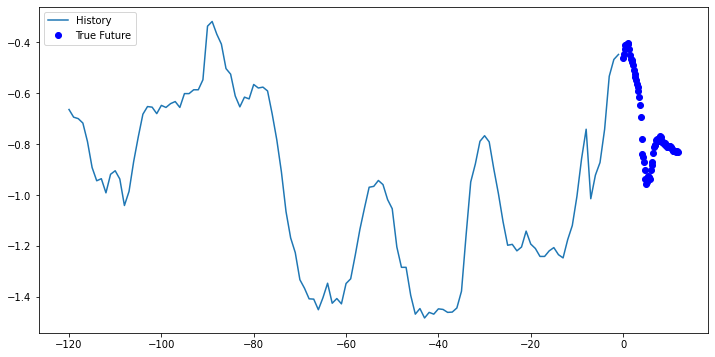

In [95]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

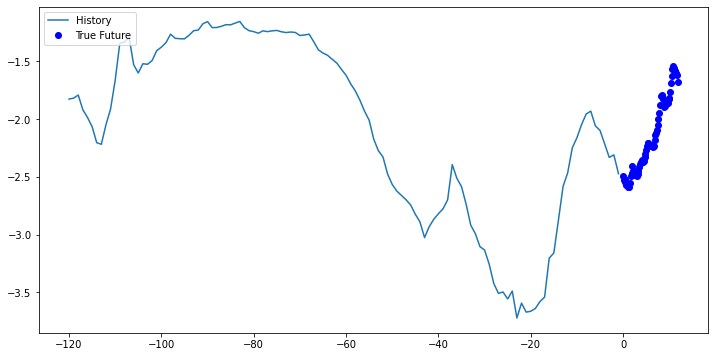

In [65]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

Dado que la tarea aquí es un poco más complicada que la tarea anterior, el modelo ahora consta de dos capas LSTM. Finalmente, dado que se hacen 72 predicciones, la capa densa genera 72 predicciones.

### Modelo LSTM

In [96]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [97]:
multi_step_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 32)           4608      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 72)                1224      
Total params: 8,968
Trainable params: 8,968
Non-trainable params: 0
_________________________________________________________________


Veamos como predice el modelo antes de entrenarlo.



In [98]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)


(256, 72)


### Entrena

In [ ]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 227s 1s/step - loss: 1.6560 - val_loss: 0.3004
Epoch 2/10
200/200 [==============================] - 208s 1s/step - loss: 0.3412 - val_loss: 0.2851
Epoch 3/10
200/200 [==============================] - 183s 914ms/step - loss: 0.3162 - val_loss: 0.2415
Epoch 4/10
 86/200 [===========>..................] - ETA: 1:39 - loss: 0.2504

In [ ]:
plot_train_history(multi_step_history, 'Entrenamiento del Modelo Multipaso y función de pérdida')

## <span style="color:blue">Predicciones</span>


Veamos ahora qué tan bien la red ha aprendido a predecir el futuro.

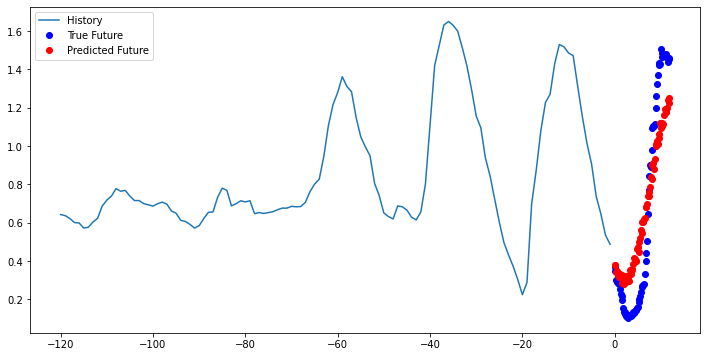

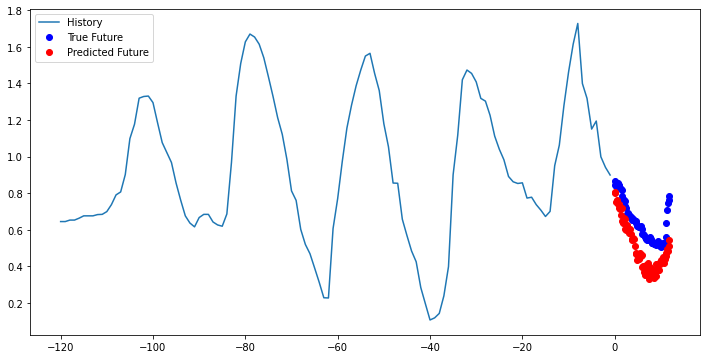

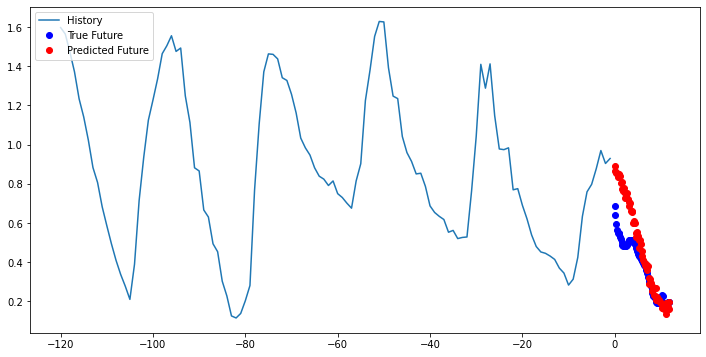

In [71]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

## <span style="color:blue">Los siguientes pasos</span>


Este cuaderno fue una introducción rápida a la predicción de series de tiempo utilizando un RNR. Ahora puede intentar predecir el mercado de valores y convertirse en multimillonario.

Además, también puede escribir un generador para generar datos (en lugar de la función uni / multivariate_data), que sería más eficiente en la memoria. También puede ver [time series windowing](https://www.tensorflow.org/guide/data#time_series_windowing). Úselo para mejorar el código de este cuaderno.